# PROJECT - 4 - Application of Clustering Models
## By Prakash Ghosh
---

### Problem Statement: Application of Clustering Models

* Dataset Link: https://drive.google.com/file/d/1pP0Rr83ri0voscgr95-YnVCBv6BYV22w/view
---
#### Problem 1: There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance.
---
#### Problem 2: How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.
---
#### Problem 3: Identify which all stocks are moving together and which all stocks are different from each other.
---

### Solution:

In [10]:
# Import Required Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition, datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()
sns.set_style('whitegrid')

%matplotlib inline
from datetime import datetime

#### Load Data

In [3]:
# Load data from link
# File downloaded as data_stocks.csv from the URL="https://drive.google.com/file/d/1pP0Rr83ri0voscgr95-YnVCBv6BYV22w/view"
file_name="data_stocks.csv"
df = pd.read_csv(file_name)
df.head(10)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.520,...,84.3700,119.035,44.40,39.88,82.0300,7.360,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.480,...,84.3700,119.035,44.11,39.88,82.0300,7.380,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.930,...,84.5850,119.260,44.09,39.98,82.0200,7.360,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.440,...,84.4600,119.260,44.25,39.99,82.0200,7.350,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.600,...,84.4700,119.610,44.11,39.96,82.0300,7.360,50.20,63.91,121.695,53.240
5,1491226500,2365.6201,42.5399,143.7800,130.0700,82.040,102.0400,85.9200,59.610,121.700,...,84.4825,119.580,44.15,39.96,82.0300,7.360,50.20,63.84,121.850,53.220
6,1491226560,2365.2000,42.4700,143.8640,130.1800,82.120,102.3300,85.9120,59.540,121.630,...,84.5000,119.320,44.20,39.98,82.0566,7.365,50.33,63.83,122.100,53.330
7,1491226620,2365.2900,42.4700,143.8100,130.1400,82.190,102.3700,85.8200,59.410,121.610,...,84.5200,119.110,44.12,39.95,82.0000,7.360,50.30,63.83,122.280,53.370
8,1491226680,2364.3201,42.3900,143.8150,130.1000,82.230,102.3800,85.8800,59.430,121.715,...,84.4800,119.310,44.12,39.93,81.9500,7.370,50.25,63.85,121.875,53.330
9,1491226740,2364.6399,42.3300,143.8000,130.2100,82.165,102.3300,85.8600,59.260,121.850,...,84.4000,119.150,44.17,39.86,81.9000,7.365,50.22,63.84,121.930,53.400


---
### Problem 1: There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance.
---
#### Analyze Data

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [22]:
df.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [23]:
# Check Null
df.isnull().values.any()

False

In [14]:
# Drop date variable
df_new = df.copy()
df_new = df_new.drop(['DATE'], 1)
# Dimensions of dataset
n = df_new.shape[0]
p = df_new.shape[1]
# Make data a numpy array
df_new = df_new.values

In [15]:
df_new

array([[2363.6101,   42.33  ,  143.68  , ...,   63.86  ,  122.    ,
          53.35  ],
       [2364.1001,   42.36  ,  143.7   , ...,   63.74  ,  121.77  ,
          53.35  ],
       [2362.6799,   42.31  ,  143.6901, ...,   63.75  ,  121.7   ,
          53.365 ],
       ...,
       [2470.03  ,   44.74  ,  164.01  , ...,   76.88  ,  114.31  ,
          62.685 ],
       [2471.49  ,   44.71  ,  163.88  , ...,   76.83  ,  114.23  ,
          62.6301],
       [2471.49  ,   44.74  ,  163.98  , ...,   76.81  ,  114.28  ,
          62.68  ]])

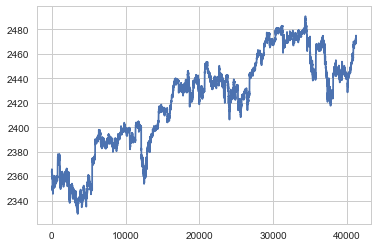

In [18]:
plt.plot(df['SP500'])

#### Principal Component Analysis

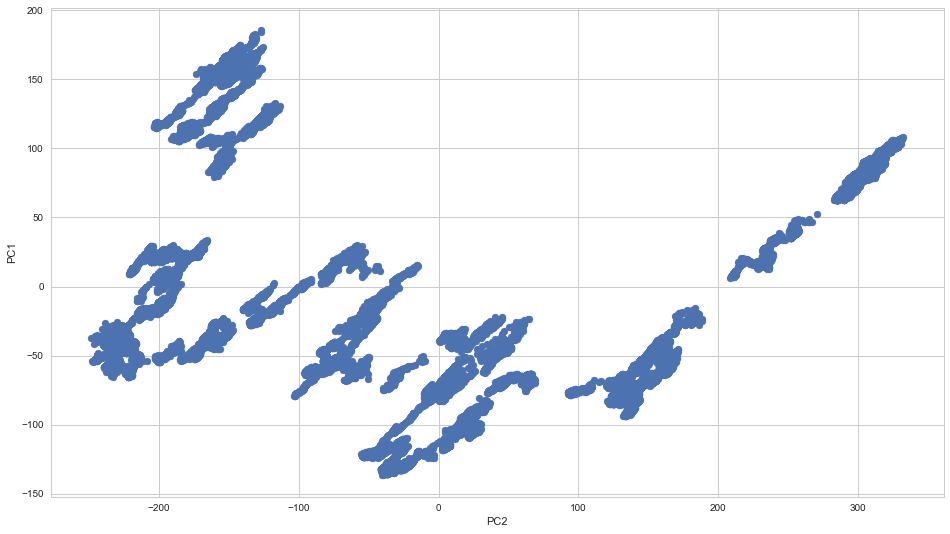

In [19]:
pca = PCA(n_components=3)
pca.fit(df_new)
df_pca = pca.transform(df_new)

#Scatter Plot
plt.figure(figsize=(16,9))
plt.scatter(df_pca[:,0],df_pca[:,1])
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.show()

#### KMeans Clustering

In [20]:
df_pca

array([[ 312.06471872,   82.16326685,   61.13922645],
       [ 308.40806514,   78.09348261,   61.7988178 ],
       [ 306.77364778,   77.32427431,   59.11828842],
       ...,
       [-201.54427195,  118.68060234,  -59.00831309],
       [-200.92133737,  119.16896696,  -58.55435589],
       [-202.42056915,  117.64446307,  -59.82857205]])

In [24]:
# Finding optimum number of clusters for KMEANS cluster - Elbow Method
k = []
inertia = []
for i in range(1,20):
    k_means = KMeans(n_clusters = i, random_state = 0)
    k_means.fit(df_new)
    k.append(i)
    inertia.append(k_means.inertia_)

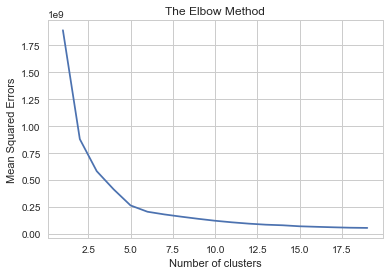

In [25]:
# Plot to find the Number of clusters 
plt.plot(k,inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Mean Squared Errors')
plt.show()

#### Observation - 1 : Optimum number of cluster from the above graph can be determined as 5

In [28]:
# with the number of KMeans cluster =5 
k_means = KMeans(n_clusters=5,random_state=0,init='k-means++')
k_means.fit(df_pca)
y_kmeans = k_means.fit_predict(df_pca)
labels = k_means.labels_
labels

array([1, 1, 1, ..., 4, 4, 4])

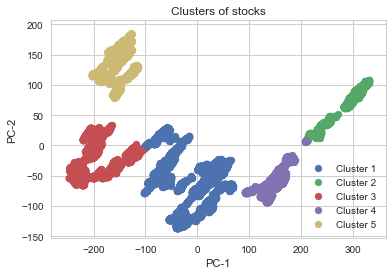

In [31]:
plt.scatter(df_pca[y_kmeans == 0, 0], df_pca[y_kmeans == 0, 1], label = 'Cluster 1')
plt.scatter(df_pca[y_kmeans == 1, 0], df_pca[y_kmeans == 1, 1], label = 'Cluster 2')
plt.scatter(df_pca[y_kmeans == 2, 0], df_pca[y_kmeans == 2, 1], label = 'Cluster 3')
plt.scatter(df_pca[y_kmeans == 3, 0], df_pca[y_kmeans == 3, 1], label = 'Cluster 4')
plt.scatter(df_pca[y_kmeans == 4, 0], df_pca[y_kmeans == 4, 1], label = 'Cluster 5')
plt.title('Clusters of stocks')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.legend()
plt.show()

#### Answer of Problem -1 : The above 5 clusters shows the stocks which are similar in stock performance

---
### Problem 2: How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

In [35]:
df_pc = df.copy()
df_pc = df_pc.drop(['DATE'], 1)
df_pc = pd.DataFrame(pca.components_,columns=df_pc.columns)
df_pc.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,-0.216015,-0.013154,-0.019954,-0.037492,-0.002238,-0.012834,-0.046234,0.020698,-0.029902,-0.010598,...,-0.025495,0.053557,-0.006509,-0.008246,0.006465,-0.056593,-0.017503,-0.021884,-0.003642,-0.016099
1,-0.030758,-0.017003,0.015011,0.011668,-0.006525,0.020935,-0.020952,0.004190,0.077607,-0.013710,...,-0.028626,-0.000651,0.004175,-0.004623,-0.013255,0.048890,0.017720,-0.001235,-0.038991,-0.015938
2,0.047246,0.007741,-0.025218,-0.014318,-0.010718,0.031483,-0.043681,0.029598,0.064317,-0.008130,...,-0.003665,0.013455,-0.010006,0.003751,0.006806,0.013691,-0.000553,-0.015602,0.018766,-0.016374


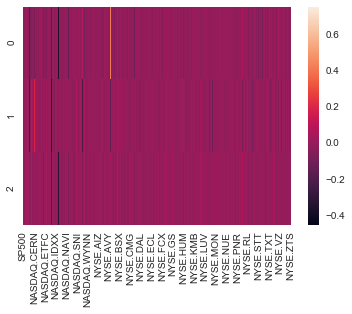

In [36]:
sns.set_style('whitegrid')
sns.heatmap(df_pc)

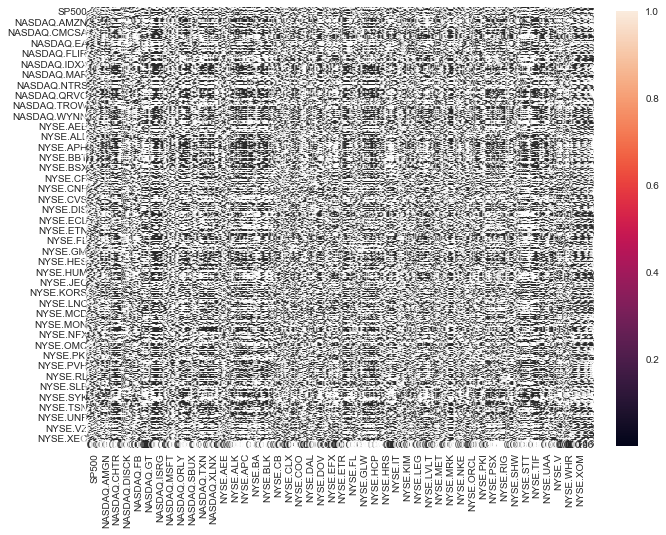

In [37]:
plt.figure(figsize=(11,8))
df_corr = df_pc.corr().abs()
sns.heatmap(df_corr,annot=True)

### Problem 3: Identify which all stocks are moving together and which all stocks are different from each other.

In [40]:
df['labels'] = labels
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,labels
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350,1
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350,1
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365,1
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380,1
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240,1


In [41]:
df['labels'].unique().tolist()

[1, 3, 0, 2, 4]

In [42]:
for i in df['labels'].unique().tolist():
    count = df[df['labels'] == i].shape[0]
    print('For lablel {}: The number of stock with similar performances is: {} '.format(i,count))

For lablel 1: The number of stock with similar performances is: 7024 
For lablel 3: The number of stock with similar performances is: 6661 
For lablel 0: The number of stock with similar performances is: 12065 
For lablel 2: The number of stock with similar performances is: 8869 
For lablel 4: The number of stock with similar performances is: 6647 
